# 棄却サンプリング

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


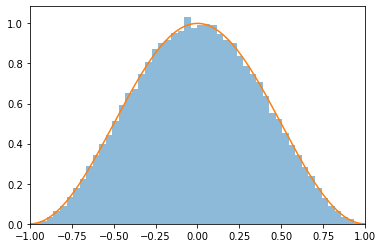

In [8]:
def p(x):
    return np.cos (0.5*np.pi*x)**2

def sampling ():
    k = 2
    while True:
        z = np.random.uniform (-1,1)
        u = k * np.random.uniform (0,0.5)
        if p(z) > u:
            return z
    
x = np.linspace(-1, 1, 500)
y = p(x)

# サンプル数
N = 100000

samples = np.array([sampling() for i in range(N)])

plt.xlim(-1, 1)
plt.hist(samples, bins=50,normed=True,alpha=0.5)
plt.plot(x, y)
plt.show()

In [6]:
from scipy import integrate

result = integrate.quad(p, -1, 1)
print (result)

(1.0, 1.1102230246251565e-14)


(200000, 2)


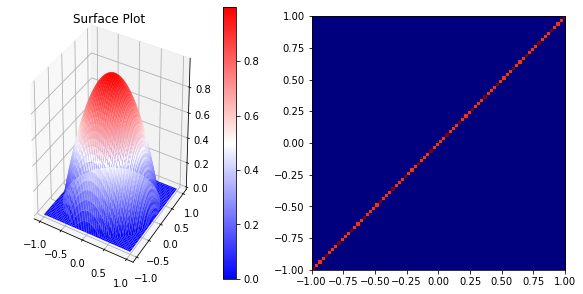

In [22]:
def p_2d (x,y):
    tmp = 1 - (x**2 + y**2)
    return tmp * (tmp>0)

def sampling_2d ():
    k = 4
    while True:
        z = np.random.uniform (-1,1,size=(2,))
        u = k * np.random.uniform (0,0.25)
        if p_2d(z[0],z[1]) > u:
            return z
        
x = np.linspace(-1, 1, 500)
y = np.linspace(-1, 1, 500)
XX, YY = np.meshgrid (x, y)

ZZ = p_2d (XX,YY)

# サンプル数
N = 200000

samples = np.array([sampling_2d() for i in range(N)])
print (samples.shape)

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(121, projection='3d')
surf = ax.plot_surface(XX, YY, ZZ, cmap='bwr', linewidth=0)
fig.colorbar(surf)
ax.set_title("Surface Plot")


ax = fig.add_subplot(122)
H = np.histogram2d(x,y, bins=[np.linspace(-1,1,81),np.linspace(-1,1,81)])
im = ax.imshow(H[0].T, interpolation='nearest', origin='lower', extent=[-1,1,-1,1], cmap=cm.jet)